In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

<hr style="border-width:2px; border-color:coral"/>
# 2d plotting in Python
<hr style="border-width:2px; border-color:coral"/>


In the following examples, we construct a solution or read a solution from a file, and plot the results using the Matplotlib pseudo-color plot.

In the first case, we use Numpy to construct the solution 

\begin{equation}
u(x,y) = \cos(4\pi(x^2 + y^2))
\end{equation}

In the second example, the solution was computed in C (see **io_binary_2d_demo.c**) and stored in the binary file **bin2d.out** is produced using MPI I/O.  In the second example here, this solution file is read and the results are plotted.

<hr/>
### Utility plotting routine

This file is saved to **plot2d.py**.

In [2]:
%%file plot2d.py

import numpy as np
import matplotlib.pyplot as plt

def plot_2d_pcolor(ax,ay,bx,by,N,u):
    
    dx = (bx-ax)/N
    dy = (by-ay)/N
    xe = np.linspace(ax,bx,N+1)
    ye = np.linspace(ay,by,N+1)
    xc = xe[:-1] + dx/2
    yc = ye[:-1] + dy/2
    xem, yem = np.meshgrid(xe,ye)
    xcm, ycm = np.meshgrid(xc,yc)

    plt.pcolor(xem, yem, u)
    plt.xlim([ax,bx])
    plt.ylim([ay,by])
    plt.axis('square')

    plt.show()

Overwriting plot2d.py


In [3]:
%reload_ext autoreload
%autoreload 2

from plot2d import *

### Construct solution using Numpy

In [4]:
%%time 

# generate 2 2d grids for the x & y bounds
N = 128

ax = -1
bx = 1
ay = -1
by = 1
dx = (bx-ax)/N
dy = (by-ay)/N
xe = np.linspace(ax,bx,N+1)
ye = np.linspace(ay,by,N+1)
xc = xe[:-1] + dx/2
yc = ye[:-1] + dy/2
xem, yem = np.meshgrid(xe,ye)
xcm, ycm = np.meshgrid(xc,yc)

# Construct solution
zcm = np.cos(4*np.pi*(xcm**2 + ycm**2))    

CPU times: user 667 µs, sys: 273 µs, total: 940 µs
Wall time: 763 µs


### Plot solution

<IPython.core.display.Javascript object>


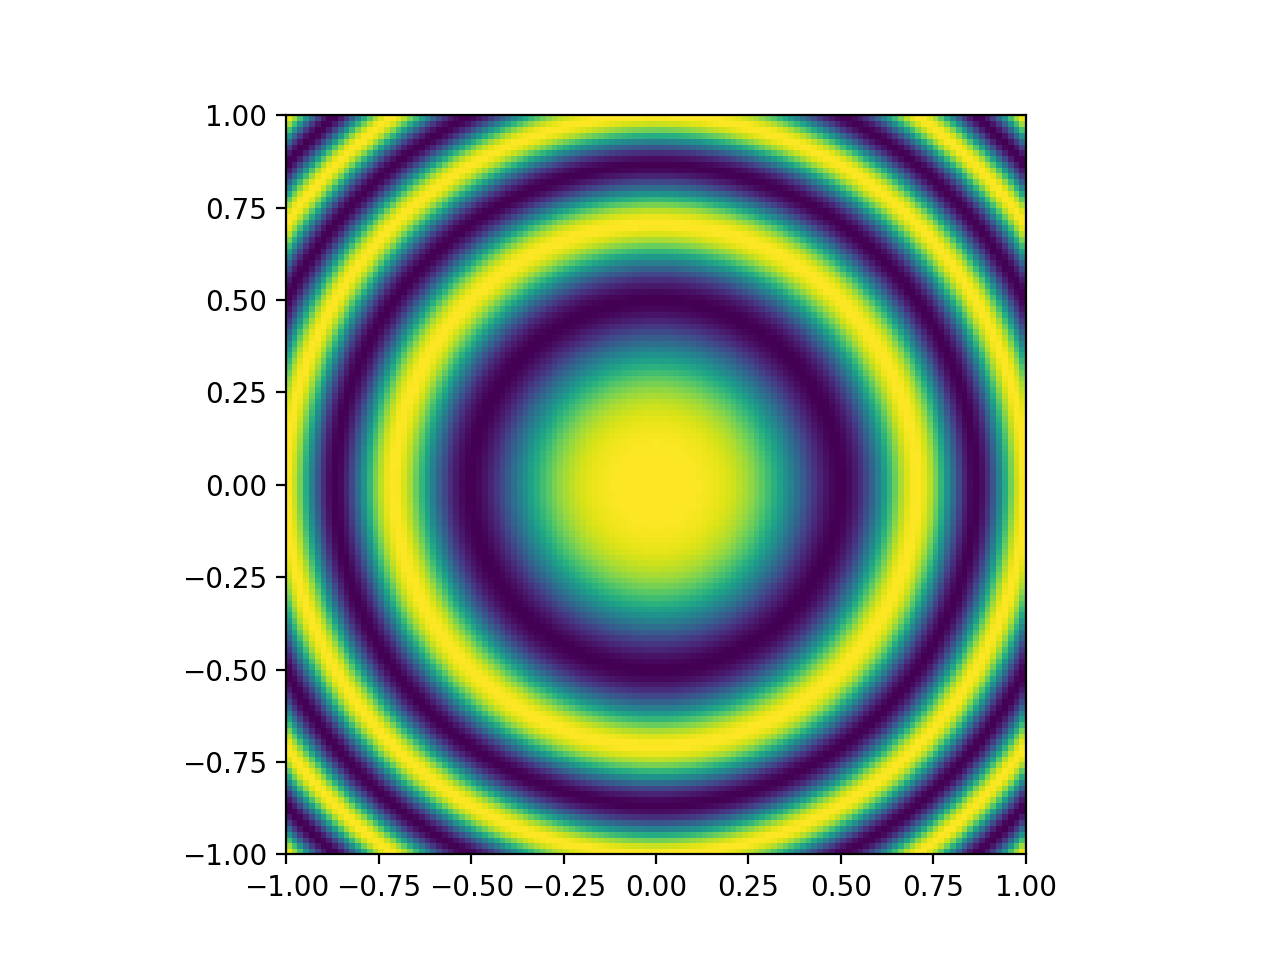

CPU times: user 396 ms, sys: 25.3 ms, total: 421 ms
Wall time: 429 ms


In [5]:
%%time 

plt.figure(1)
plot_2d_pcolor(ax,ay,bx,by,N,zcm)

### Read in solution from a binary file

In [8]:
%%time

import numpy as np
f = open("bin2d.out","rb")

# Open file and read  meta data with specified type 
# Everything is 8-byte aligned : 8 + 8 + 8 + 8 + 4 + 4 + 4 + 4 = 48  (divisible by 8)
# so we do not need any padding.
dt = np.dtype([('ax','d'),('bx','d'),('ay','d'),('by','d'),
               ('mx','int32'),('my','int32'),('L','int32'),('m','int32')])
ax,ay,bx,by,mx,my,L,m = np.fromfile(f,dtype=dt,count=1)[0]

# Read in solution
u = np.fromfile(f,dtype='d')
u = np.reshape(u,(mx,my))

CPU times: user 145 µs, sys: 89 µs, total: 234 µs
Wall time: 238 µs


### Plot solution

<IPython.core.display.Javascript object>


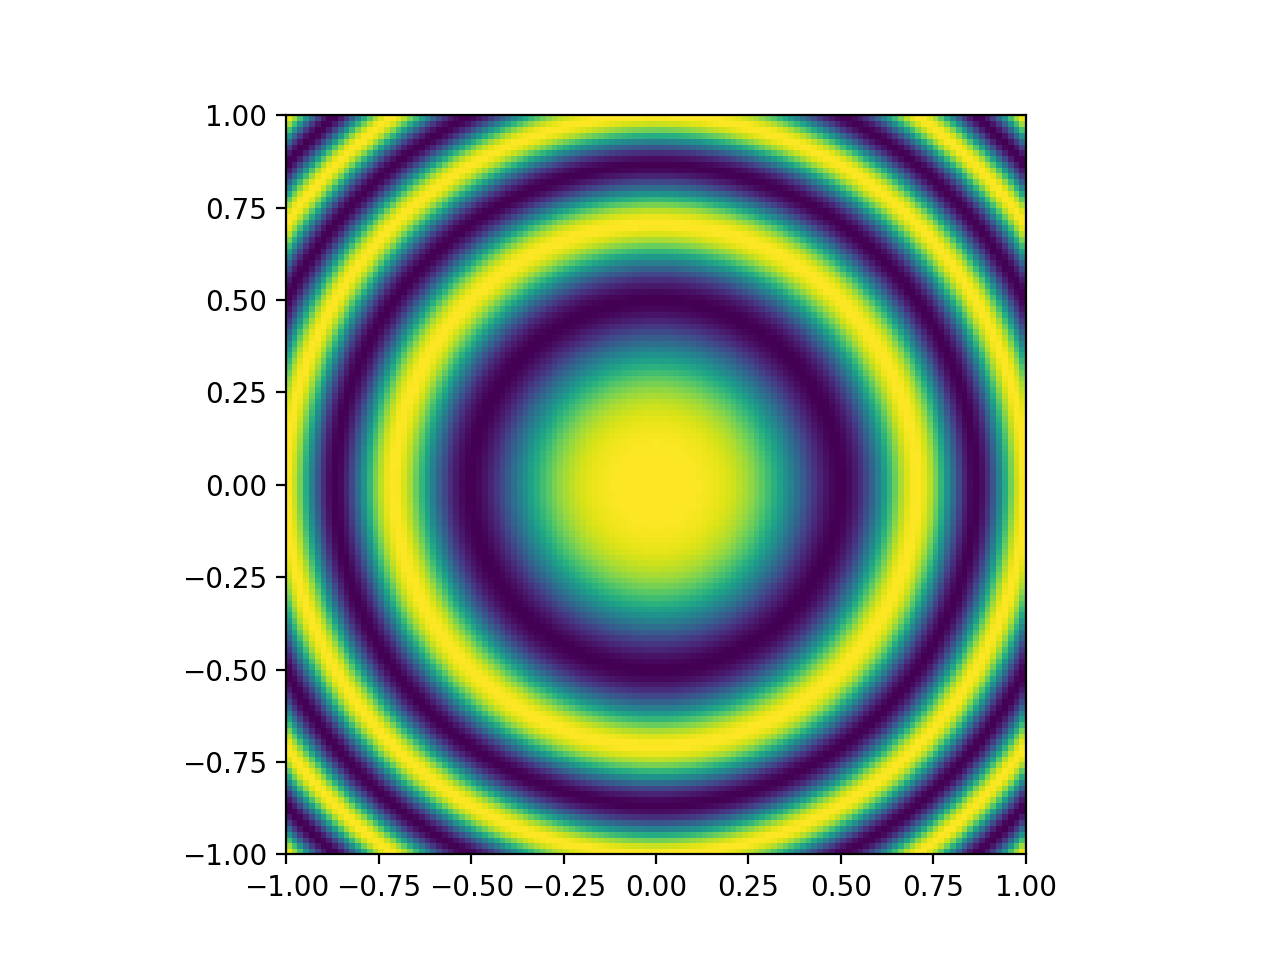

CPU times: user 379 ms, sys: 17.1 ms, total: 396 ms
Wall time: 390 ms


In [7]:
%%time 

plt.figure(2)
plot_2d_pcolor(ax,ay,bx,by,N,u)